# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

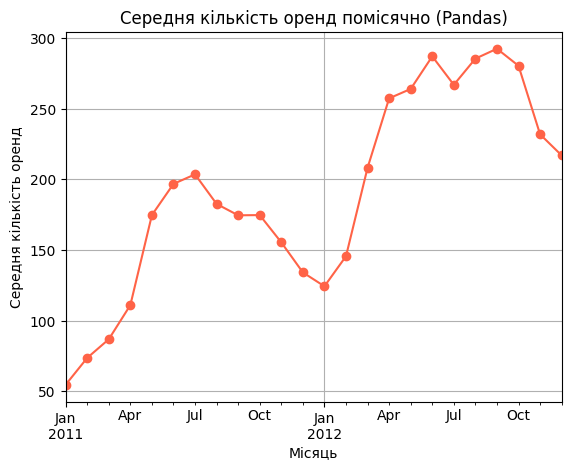

In [21]:
monthly_avg = df['count'].resample('M').mean()

# Побудова з Pandas
monthly_avg.plot(marker='o', color='tomato', title='Середня кількість оренд помісячно (Pandas)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

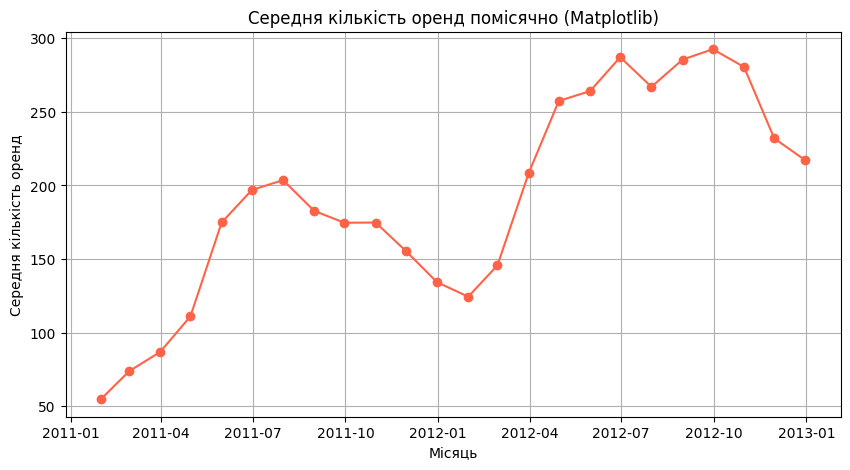

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='tomato')
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

я більше працював з matplotlib, для мене він зручніше, я навіть зараз збагнув що першу домашку теж матплотліб використав

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [23]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

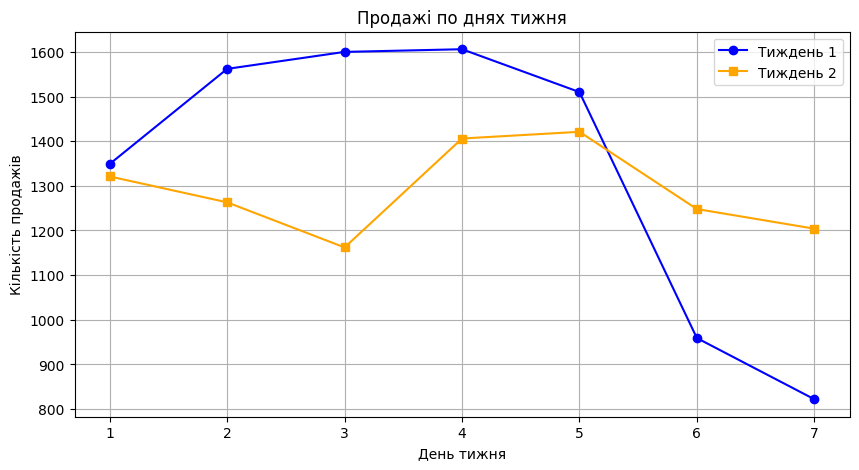

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='blue')
plt.plot(days, sales_week2, marker='s', label='Тиждень 2', color='orange')
plt.title('Продажі по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.legend()
plt.grid(True)
plt.show()


1перший графік більш стабільнишй
2Можна порівняти стандартне відхилення (std) для кожного тижня: чим менше — тим стабільніше.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

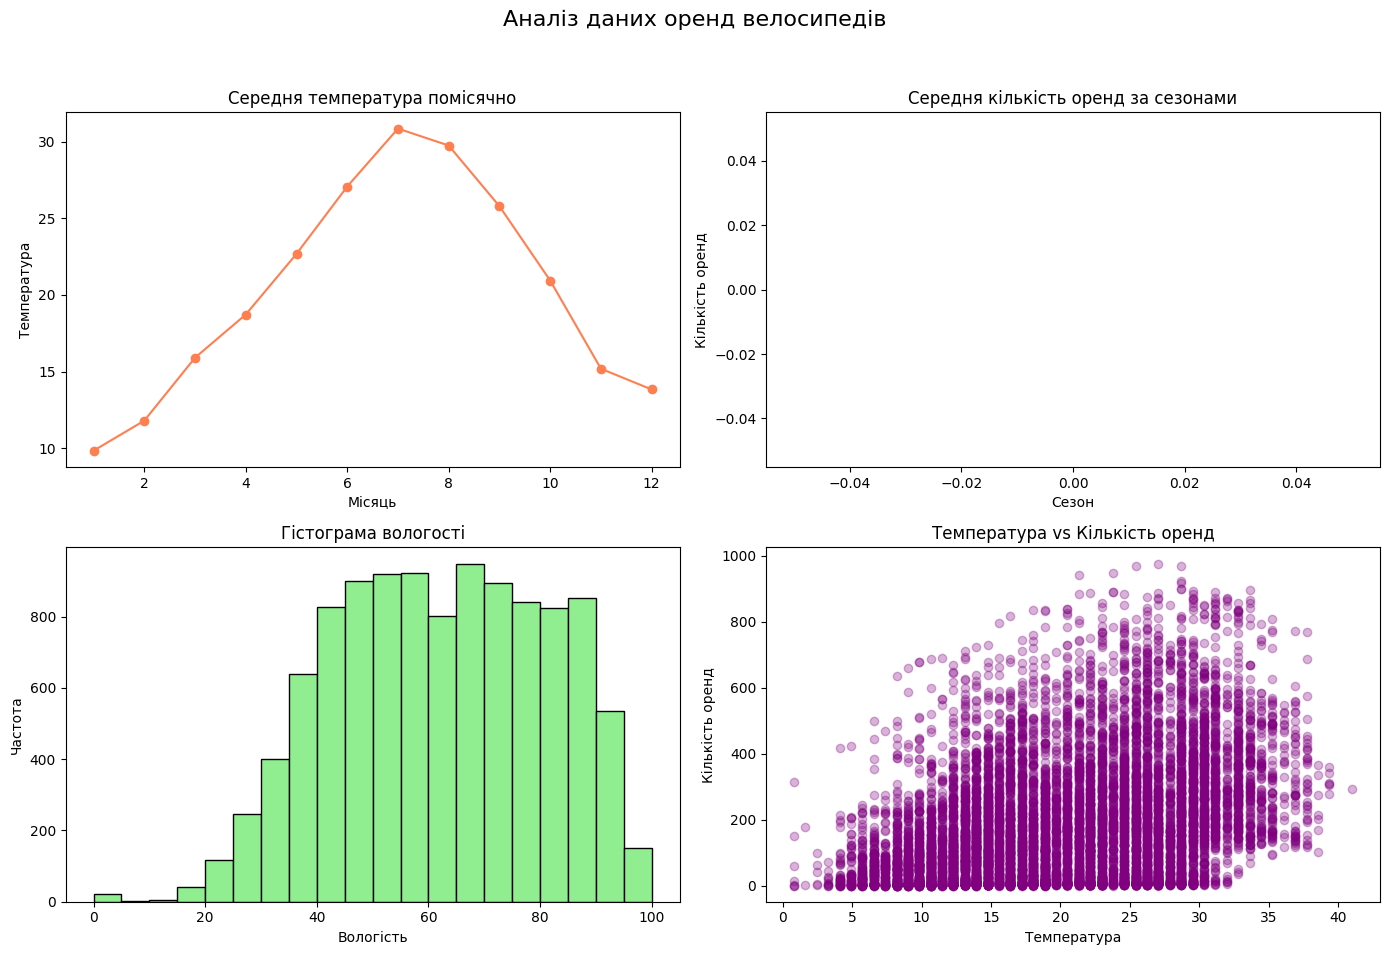

In [30]:

df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

plt.figure(figsize=(14, 10))
plt.suptitle('Аналіз даних оренд велосипедів', fontsize=16)

# 1. Середня температура помісячно
plt.subplot(2, 2, 1)
monthly_temp = df.groupby('month')['temp'].mean()
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='coral')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')

# 2. Середня кількість оренд за сезонами
plt.subplot(2, 2, 2)
seasonal_hourly = df.groupby('season')['count'].mean()
plt.bar(seasonal_hourly.index, seasonal_hourly.values, color='skyblue')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Гістограма вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')

# 4. Scatter plot: температура vs оренди
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.3, color='purple')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

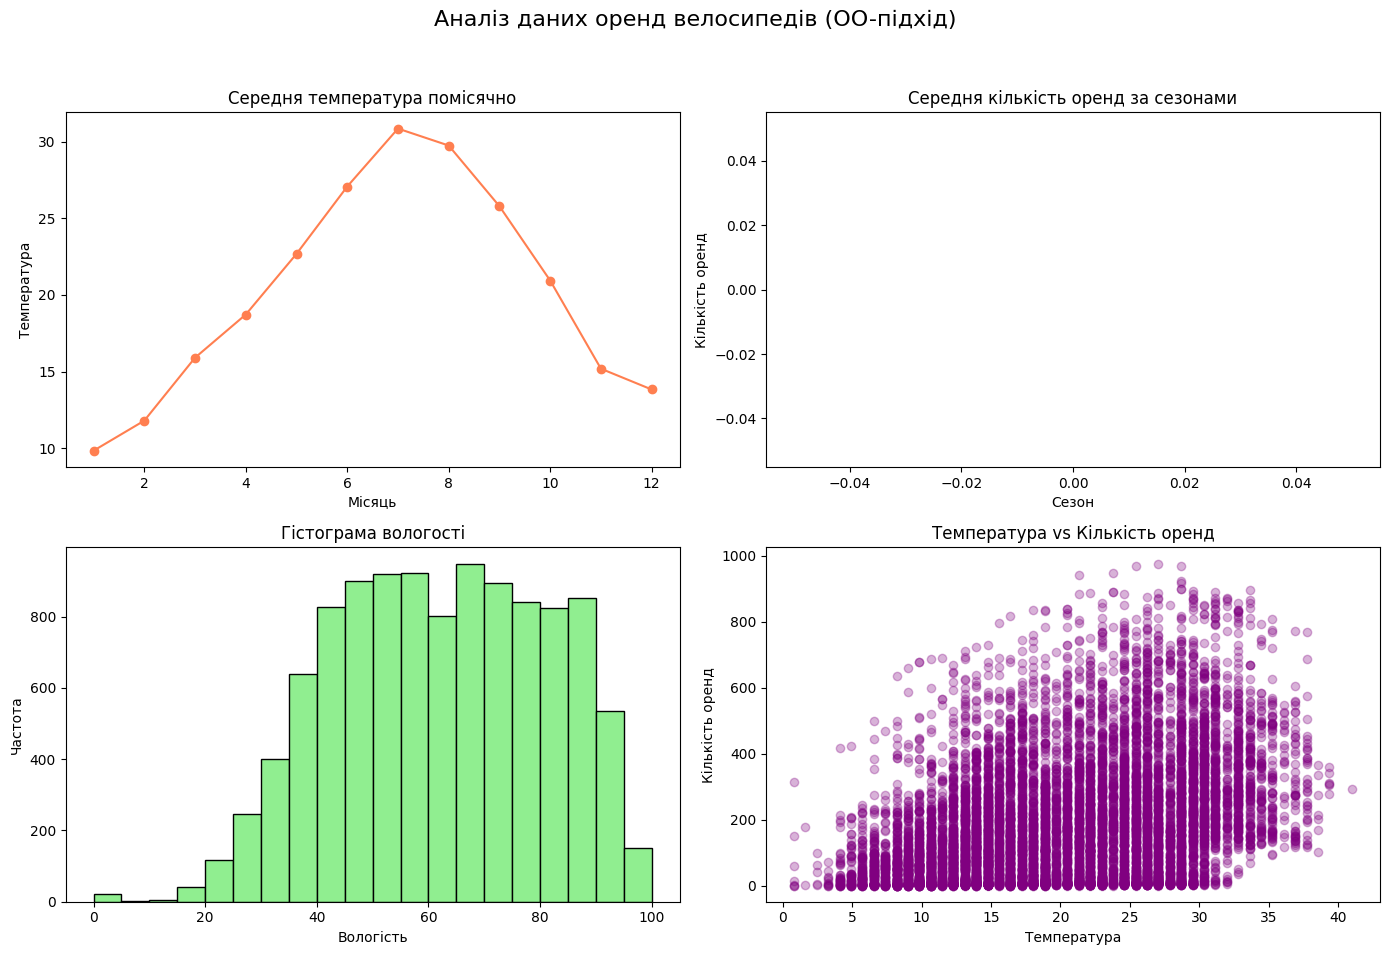

In [28]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Обчислення агрегацій
monthly_temp = df.groupby('month')['temp'].mean()
seasonal_hourly = df.groupby('season')['count'].mean()
humidity = df['humidity']
temp = df['temp']
count = df['count']

# Створення підграфіків
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Аналіз даних оренд велосипедів (OO-підхід)', fontsize=16)

# 1. Лінійний графік середньої температури
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='coral')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')

# 2. Стовпчикова діаграма середньої кількості оренд за сезонами
ax[0, 1].bar(seasonal_hourly.index, seasonal_hourly.values, color='skyblue')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')

# 3. Гістограма вологості
ax[1, 0].hist(humidity, bins=20, color='lightgreen', edgecolor='black')
ax[1, 0].set_title('Гістограма вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')

# 4. Scatter plot: температура vs кількість оренд
ax[1, 1].scatter(temp, count, alpha=0.3, color='purple')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

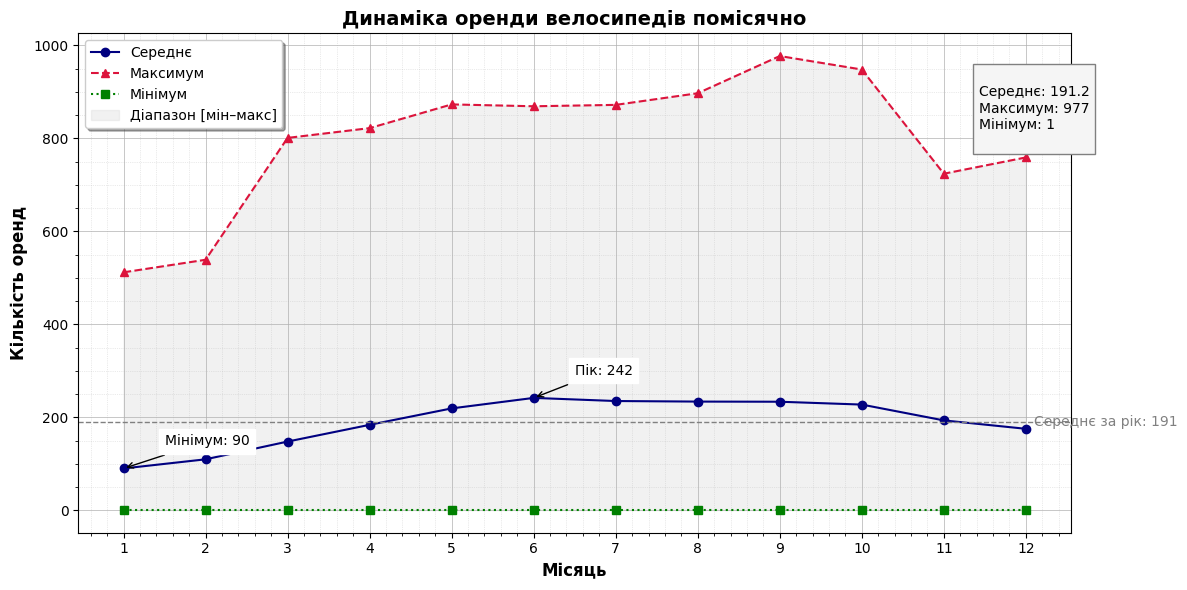

In [ ]:


# Агрегація
monthly = df.groupby('month')['count']
avg = monthly.mean()
min_ = monthly.min()
max_ = monthly.max()
months = range(1, 13)

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(months, avg, label='Середнє', linestyle='-', marker='o', color='navy')
plt.plot(months, max_, label='Максимум', linestyle='--', marker='^', color='crimson')
plt.plot(months, min_, label='Мінімум', linestyle=':', marker='s', color='green')

# Заливка між min і max
plt.fill_between(months, min_, max_, color='lightgray', alpha=0.3, label='Діапазон [мін–макс]')

# Горизонтальна лінія середнього по року
yearly_avg = avg.mean()
plt.axhline(yearly_avg, color='gray', linestyle='--', linewidth=1)
plt.text(12.1, yearly_avg, f'Середнє за рік: {yearly_avg:.0f}', va='center', ha='left', fontsize=10, color='gray')

# найвище і найнижче середне значення
max_month = avg.idxmax()
min_month = avg.idxmin()

plt.annotate(f'Пік: {int(avg[max_month])}',
             xy=(max_month, avg[max_month]),
             xytext=(max_month + 0.5, avg[max_month] + 50),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, backgroundcolor='white')

plt.annotate(f'Мінімум: {int(avg[min_month])}',
             xy=(min_month, avg[min_month]),
             xytext=(min_month + 0.5, avg[min_month] + 50),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, backgroundcolor='white')

# Сітка
plt.grid(which='major', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Легенда 
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=10)

# Текстовий блок
textstr = f"""
Середнє: {avg.mean():.1f}
Максимум: {max_.max():.0f}
Мінімум: {min_.min():.0f}
"""
plt.gcf().text(0.82, 0.75, textstr, fontsize=10,
               bbox=dict(facecolor='whitesmoke', edgecolor='gray'))

# Оформлення
plt.title('Динаміка оренди велосипедів помісячно', fontsize=14, fontweight='bold')
plt.xlabel('Місяць', fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренд', fontsize=12, fontweight='bold')
plt.xticks(months)
plt.tight_layout()
plt.show()


1Анотації дозволяють швидко знайти важливі точки, наприклад піки чи провали.
2Метод fill_between() використовується для візуального підкреслення діапазону між двома лініями/
3Текстовий блок в кутку графіка — це коротке резюме, яке дозволяє отримати основну статистику без необхідності аналізувати всі точки графіка.1